# Lead Case Study

### Step 1 : Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the dataset
lead=pd.read_csv("Leads.csv")

In [4]:
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


## Step 2: Inspecting the data and Sanity Checks

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
round(lead.isnull().sum()/len(lead.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# convert 'select' to null value

lead=lead.replace('Select',np.nan)

### Check Missing value and drop the columns

In [9]:
# Drop the column which has >=45% of null values
lead.drop(["Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Activity Index","Lead Quality"],axis=1,inplace=True)

In [10]:
lead['City'].value_counts()/len(lead.index)*100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [11]:
extracol = ["How did you hear about X Education","Search","Magazine","Newspaper Article","X Education Forums","Lead Profile","Newspaper","Through Recommendations", "Receive More Updates About Our Courses","I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content","Digital Advertisement"]

In [12]:
lead.drop(extracol,axis=1,inplace=True)

In [13]:
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened


In [14]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
lead['Specialization'].value_counts()/len(lead.index)*100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
lead.isnull().sum()/len(lead.index)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.7077

In [17]:
lead["Specialization"].value_counts()/len(lead.index)*100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

### Impute the null value with median of each column

In [18]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 22% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 70% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 70% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 70% data is of "India" and hence it is safer to impute NULLS with this value
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [19]:
lead.dropna(inplace=True)

lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened


In [20]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [21]:
lead["Last Activity"].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [22]:
lead["What is your current occupation"].value_counts()/len(lead.index)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

#### Bucketing for < 2% of values in categorical columns

In [23]:

lead['Tags'] = lead['Tags'].replace(['Interested  in full time MBA','In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Graduation in progress','number not provided', 'opp hangup','Still Thinking','invalid number','wrong number given',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','Not doing further education','Lost to EINS'], 'Other_Tags')

In [24]:
lead['Last Activity'] = lead['Last Activity'].replace(["Form Submitted on Website",'Unreachable','Unsubscribed','Had a Phone Conversation', 'View in browser link Clicked',
                   'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails', 'Email Received', 'Email Marked Spam'],'Other Activity')

In [25]:
lead['Lead Source'] = lead['Lead Source'].replace(['Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],'Other Lead Source')

In [26]:
lead["Specialization"]=lead["Specialization"].replace(['International Business', 'E-COMMERCE','Retail Management', 'Services Excellence',
       'Hospitality Management', 'Rural and Agribusiness','Healthcare Management', 'E-Business'], 'Extra Specialization')

In [27]:
lead["What is your current occupation"]=lead["What is your current occupation"].replace(['Students','Businessman', 'Other', 'Housewife'], 'Other Occupation')

In [28]:
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened


In [29]:
numerical=lead.select_dtypes(exclude=["object"])
categorical=lead.select_dtypes(include=["object"])

In [30]:
numerical.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.0
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,1.0,305,1.0
4,660681,1,2.0,1428,1.0


In [31]:
categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Other Activity,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


## EDA and Data cleaning

### Univariant Analysis

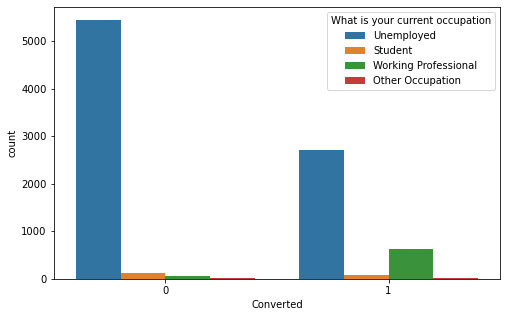

In [32]:
plt.figure(figsize=(8,5))
sns.countplot("Converted",hue="What is your current occupation",data=lead)
plt.show()


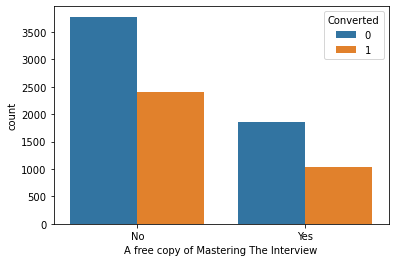

In [33]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead,)
plt.show()

Observation:

    "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [34]:
dropcol=["Lead Number","A free copy of Mastering The Interview"]

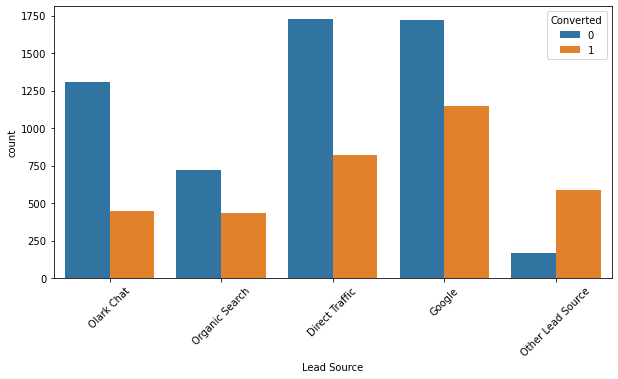

In [35]:
plt.figure(figsize=(10,5))
sns.countplot("Lead Source",hue="Converted",data=lead)
plt.xticks(rotation=45)
plt.show()

OBSERVATION:
    
1. The count of leads from the Google and Direct Traffic is maximum
2. The conversion rate of the leads from Reference and Welingak Website is maximum

In [36]:
lead['Country'].value_counts()/len(lead.index)*100

India                   96.837117
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switzerland   

###### As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [37]:
dropcol.append("Country")

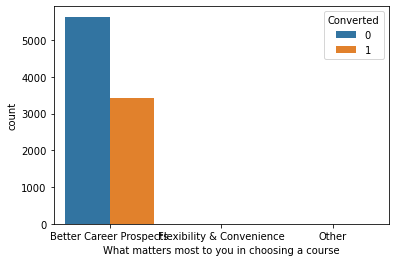

In [38]:
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead)
plt.show()

###### 99% of of data is belongs to 'Better career Prospecties', so no inference can be drawn from this parameter.Hence, we can drop this column

In [39]:
dropcol.append("What matters most to you in choosing a course")

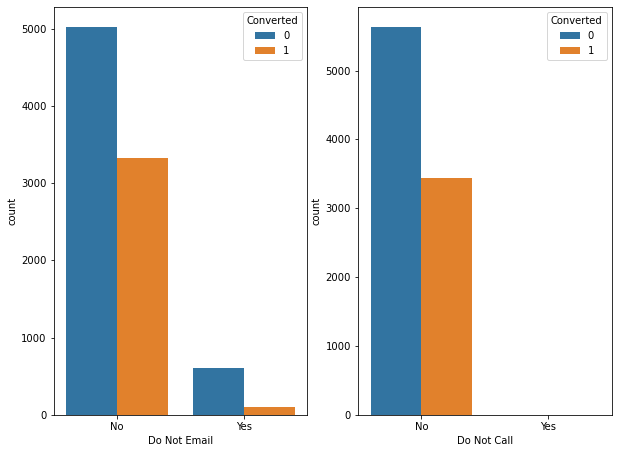

In [40]:
fig, axs = plt.subplots(1,2,figsize = (10,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1])
plt.show()

##### We Can drop the "Do Not Call" Column from the data set which is higtly skewed

In [41]:
dropcol.append("Do Not Call")

### Bivariant Analysis

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

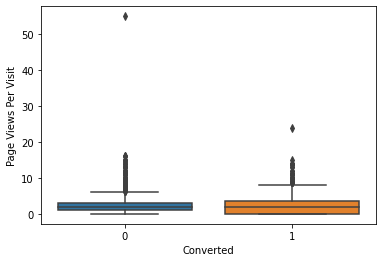

In [42]:
sns.boxplot(x="Converted",y="Page Views Per Visit",data=lead)

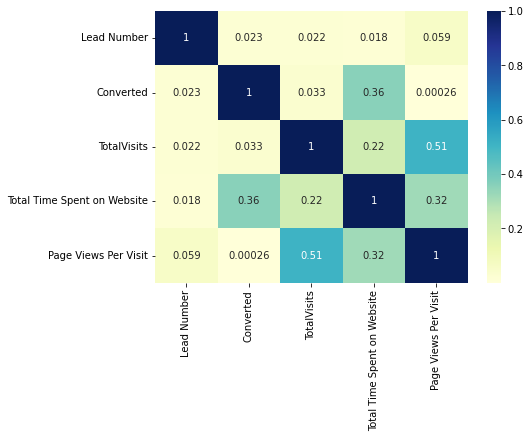

In [43]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(7,5))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [44]:
dropcol.append('Last Notable Activity')

In [45]:
lead.drop(dropcol,axis=1,inplace=True)

In [46]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  City                

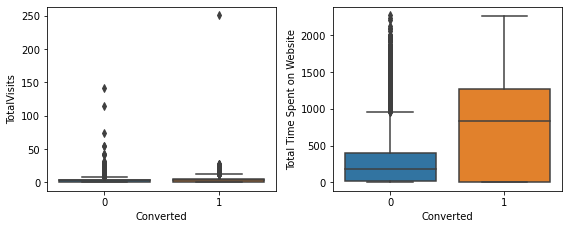

In [47]:
fig=plt.subplots(figsize=(8, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead)
    plt.tight_layout()

In [48]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City'],
      dtype='object')

### Outlier Treatments on Continuous Variables

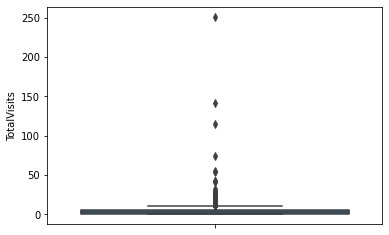

In [49]:
#visualizing spread of variable Total Visits

sns.boxplot(y=lead['TotalVisits'])
plt.show()

###### Presence of outliers can be seen clearly

In [50]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

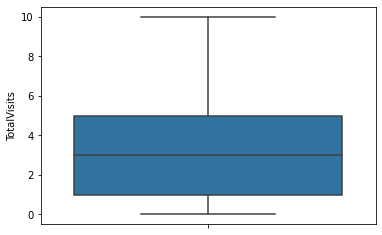

In [51]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead['TotalVisits'])
plt.show()

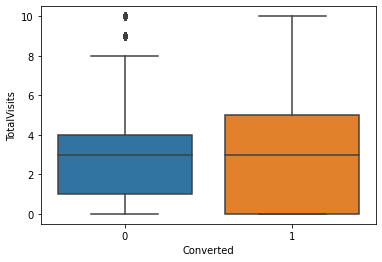

In [52]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

In [53]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

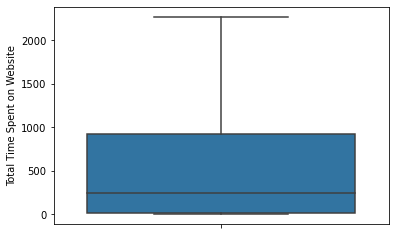

In [54]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = lead['Total Time Spent on Website'])
plt.show()

###### Since there are no major outliers for the above variable, outlier treatment is not required for it

In [55]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

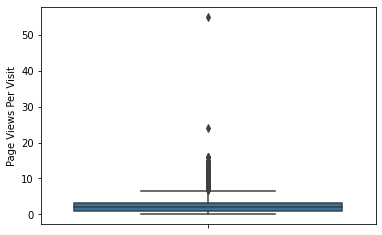

In [56]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =lead['Page Views Per Visit'])
plt.show()

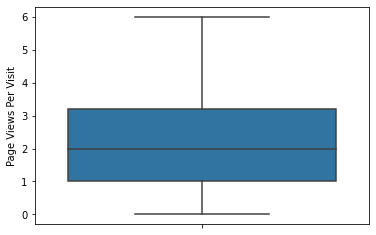

In [57]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

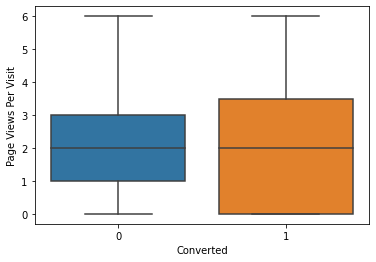

In [58]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

In [59]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  City                

In [60]:
lead["Do Not Email"].unique()

array(['No', 'Yes'], dtype=object)

### PreProcessing

#### Dummy variable creation

In [61]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Do Not Email',
                              'Tags','City']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
lead_df=pd.concat([lead,dummy], axis=1)
lead_df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,1,0,0,0,0,0,0


In [63]:
lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City',"Do Not Email"], axis=1, inplace=True)

In [64]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Google                                    9074

### Test-Train Split

In [65]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [66]:
x=lead_df.drop(["Prospect ID","Converted"],axis=1)
y=lead_df["Converted"]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7,random_state=100, stratify=y)

### Feature Selection

In [68]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,...,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5191,-1.150107,-0.884115,-1.263078,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6400,1.378218,-0.864051,0.038697,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6058,-0.427729,-0.426296,-0.145674,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2988,1.017028,1.363025,0.413028,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6352,0.294650,1.291890,0.971729,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [70]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form    Lead Source_Other Lead Source            0.862686
TotalVisits                  Page Views Per Visit                     0.766567
Last Activity_Email Bounced  Do Not Email_Yes                         0.620041
Page Views Per Visit         Lead Origin_Landing Page Submission      0.554142
Lead Source_Olark Chat       Specialization_Other_Specialization      0.509466
TotalVisits                  Lead Origin_Landing Page Submission      0.454350
Lead Source_Olark Chat       Last Activity_Olark Chat Conversation    0.424419
Total Time Spent on Website  Page Views Per Visit                     0.364735
TotalVisits                  Total Time Spent on Website              0.361207
Converted                    Total Time Spent on Website              0.359261
dtype: float64

In [71]:
x_test = x_test.drop(['Lead Source_Other Lead Source'], axis=1)
x_train = x_train.drop(['Lead Source_Other Lead Source'], axis=1)

In [72]:
conv_corr = x_train.corr()

In [73]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

TotalVisits                            Page Views Per Visit                     0.769404
Last Activity_Email Bounced            Do Not Email_Yes                         0.625465
Page Views Per Visit                   Lead Origin_Landing Page Submission      0.556771
Lead Source_Olark Chat                 Specialization_Other_Specialization      0.509728
TotalVisits                            Lead Origin_Landing Page Submission      0.456559
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation    0.438043
Total Time Spent on Website            Page Views Per Visit                     0.376224
TotalVisits                            Total Time Spent on Website              0.364812
Last Activity_Olark Chat Conversation  Specialization_Other_Specialization      0.349996
Page Views Per Visit                   Lead Source_Organic Search               0.320573
dtype: float64

## Model Building

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [75]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1945.4
Date:                Tue, 13 Sep 2022   Deviance:                       3890.9
Time:                        11:21:40   Pearson chi2:                 9.79e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5575      1.058     -4.306      0.000      -6.632      -2.483
TotalVisits                                              0.2478      0.067      3.692      0.000       0.116       0.379
Total Time Spent on Website                              1.1123      0.049     22.577      0.000       1.016       1.209
Page Views Per Visit                                    -0.3131      0.074     -4.239      0.000      -0.458      -0.168
Lead Origin_Landing Page Submission                     -0.9120      0.160     -5.702      0.000      -1.225      -0.599
Lead Origin_Lead Add Form                                3.4859      0.315     11.052      0.000       2.868       4.104
Lead Origin_Lead Import                                  0.7778      0.696      1.117      0.264      -0.587       2.143
Lead Source_Google                                      -0.0091      0.112     -0.081      0.935      -0.229       0.211
Lead Source_Olark Chat                                   0.6911      0.180      3.829      0.000       0.337       1.045
Lead Source_Organic Search                               0.1208      0.152      0.796      0.426      -0.177       0.418
Last Activity_Email Bounced                              0.0629      0.480      0.131      0.896      -0.878       1.004
Last Activity_Email Link Clicked                         0.6450      0.333      1.935      0.053      -0.008       1.298
Last Activity_Email Opened                               1.0944      0.243      4.498      0.000       0.618       1.571
Last Activity_Olark Chat Conversation                   -0.6693      0.298     -2.245      0.025      -1.253      -0.085
Last Activity_Other Activity                             1.2757      0.321      3.973      0.000       0.646       1.905
Last Activity_Page Visited on Website                    0.2154      0.297      0.725      0.468      -0.367       0.798
Last Activity_SMS Sent                                   2.5314      0.247     10.249      0.000       2.047       3.015
Specialization_Business Administration                  -0.1102      0.293     -0.377      0.706      -0.684       0.463
Specialization_Extra Specialization                     -0.4481      0.262     -1.711      0.087      -0.962       0.065
Specialization_Finance Management                       -0.1975      0.253     -0.782      0.434      -0.693       0.298
Specialization_Human Resource Management                -0.2374      0.261     -0.910      0.363      -0.749       0.274
Specialization_IT Projects Management                   -0.0939      0.305     -0.308      0.758      -0.691       0.503
Specialization_Marketing Management                     -0

### Model 1

In [76]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, 15)  
rfe = rfe.fit(x_train, y_train)


In [77]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 17),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_Extra Specialization', False, 13),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projects Management', False, 25),
 ('Specialization_Marketing Management

In [78]:
col = x_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [79]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.9
Date:                Tue, 13 Sep 2022   Deviance:                       4593.7
Time:                        11:21:45   Pearson chi2:                 9.01e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8234      0.400     -7.054      0.000      -3.608      -2.039
Lead Origin_Landing Page Submission                     -1.0085      0.131     -7.682      0.000      -1.266      -0.751
Lead Origin_Lead Add Form                                2.5261      0.276      9.157      0.000       1.985       3.067
Last Activity_Email Opened                               1.1293      0.103     10.920      0.000       0.927       1.332
Last Activity_Other Activity                             1.3255      0.215      6.159      0.000       0.904       1.747
Last Activity_SMS Sent                                   2.5356      0.110     23.052      0.000       2.320       2.751
Specialization_Other_Specialization                     -1.4988      0.135    -11.128      0.000      -1.763      -1.235
What is your current occupation_Unemployed              -1.4565      0.293     -4.966      0.000      -2.031      -0.882
What is your current occupation_Working Professional     1.1500      0.369      3.118      0.002       0.427       1.873
Do Not Email_Yes                                        -1.2623      0.180     -7.008      0.000      -1.615      -0.909
Tags_Busy                                                3.7881      0.373     10.150      0.000       3.057       4.520
Tags_Closed by Horizzon                                  8.4599      0.786     10.766      0.000       6.920      10.000
Tags_Other_Tags                                          2.7600      0.330      8.353      0.000       2.112       3.408
Tags_Ringing                                            -0.0986      0.382     -0.258      0.796      -0.848       0.651
Tags_Will revert after reading the email                 3.9637      0.313     12.671      0.000       3.351       4.577
Tags_switched off                                       -1.6092      1.054     -1.527      0.127      -3.674       0.456
========================================================================================================================
"""

In [80]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

5191    0.140041
6400    0.140041
6058    0.054609
2988    0.672739
6352    0.001427
3828    0.210041
801     0.210041
3999    0.069983
7835    0.901671
875     0.001009
dtype: float64

In [81]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
5191,0,0.140041,5191
6400,0,0.140041,6400
6058,0,0.054609,6058
2988,1,0.672739,2988
6352,0,0.001427,6352


In [82]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
5191,0,0.140041,5191,0
6400,0,0.140041,6400,0
6058,0,0.054609,6058,0
2988,1,0.672739,2988,1
6352,0,0.001427,6352,0


In [83]:
def calculate_vif(x_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = x_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(x_train[col])

                                             Features  \
10                            Tags_Closed by Horizzon   
14                                  Tags_switched off   
9                                           Tags_Busy   
3                        Last Activity_Other Activity   
7   What is your current occupation_Working Profes...   
8                                    Do Not Email_Yes   
1                           Lead Origin_Lead Add Form   
13           Tags_Will revert after reading the email   
11                                    Tags_Other_Tags   
6          What is your current occupation_Unemployed   
12                                       Tags_Ringing   
2                          Last Activity_Email Opened   
4                              Last Activity_SMS Sent   
0                 Lead Origin_Landing Page Submission   
5                 Specialization_Other_Specialization   

    Variance Inflation Factor  
10                       1.43  
14                     

In [84]:
col=col.drop("Tags_Ringing")
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

### Model 2

In [85]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.9
Date:                Tue, 13 Sep 2022   Deviance:                       4593.8
Time:                        11:21:46   Pearson chi2:                 9.05e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8756      0.349     -8.234      0.000      -3.560      -2.191
Lead Origin_Landing Page Submission                     -1.0102      0.131     -7.701      0.000      -1.267      -0.753
Lead Origin_Lead Add Form                                2.5219      0.275      9.177      0.000       1.983       3.060
Last Activity_Email Opened                               1.1297      0.103     10.922      0.000       0.927       1.332
Last Activity_Other Activity                             1.3255      0.215      6.157      0.000       0.904       1.748
Last Activity_SMS Sent                                   2.5339      0.110     23.074      0.000       2.319       2.749
Specialization_Other_Specialization                     -1.4998      0.135    -11.135      0.000      -1.764      -1.236
What is your current occupation_Unemployed              -1.4688      0.291     -5.052      0.000      -2.039      -0.899
What is your current occupation_Working Professional     1.1446      0.370      3.094      0.002       0.420       1.870
Do Not Email_Yes                                        -1.2617      0.180     -7.006      0.000      -1.615      -0.909
Tags_Busy                                                3.8550      0.271     14.214      0.000       3.323       4.387
Tags_Closed by Horizzon                                  8.5257      0.744     11.454      0.000       7.067       9.985
Tags_Other_Tags                                          2.8256      0.215     13.163      0.000       2.405       3.246
Tags_Will revert after reading the email                 4.0296      0.185     21.805      0.000       3.667       4.392
Tags_switched off                                       -1.5424      1.022     -1.509      0.131      -3.546       0.461
========================================================================================================================
"""

In [86]:
col=col.drop("Tags_switched off")
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 3

In [87]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2298.8
Date:                Tue, 13 Sep 2022   Deviance:                       4597.5
Time:                        11:21:46   Pearson chi2:                 9.29e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9579      0.351     -8.428      0.000      -3.646      -2.270
Lead Origin_Landing Page Submission                     -1.0123      0.131     -7.713      0.000      -1.270      -0.755
Lead Origin_Lead Add Form                                2.5417      0.277      9.174      0.000       1.999       3.085
Last Activity_Email Opened                               1.1304      0.103     10.922      0.000       0.928       1.333
Last Activity_Other Activity                             1.3245      0.215      6.153      0.000       0.903       1.746
Last Activity_SMS Sent                                   2.5307      0.110     23.041      0.000       2.315       2.746
Specialization_Other_Specialization                     -1.5004      0.135    -11.134      0.000      -1.764      -1.236
What is your current occupation_Unemployed              -1.4864      0.293     -5.075      0.000      -2.060      -0.912
What is your current occupation_Working Professional     1.1333      0.372      3.047      0.002       0.404       1.862
Do Not Email_Yes                                        -1.2648      0.180     -7.030      0.000      -1.617      -0.912
Tags_Busy                                                3.9585      0.269     14.734      0.000       3.432       4.485
Tags_Closed by Horizzon                                  8.6261      0.744     11.600      0.000       7.169      10.084
Tags_Other_Tags                                          2.9267      0.212     13.814      0.000       2.511       3.342
Tags_Will revert after reading the email                 4.1309      0.181     22.763      0.000       3.775       4.487
========================================================================================================================
"""

In [88]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
5191,0,0.140190,5191,0
6400,0,0.140190,6400,0
6058,0,0.050888,6058,0
2988,1,0.671939,2988,1
6352,0,0.001203,6352,0


In [89]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8378208156195874


In [90]:
calculate_vif(x_train[col])

                                             Features  \
10                            Tags_Closed by Horizzon   
3                        Last Activity_Other Activity   
9                                           Tags_Busy   
7   What is your current occupation_Working Profes...   
8                                    Do Not Email_Yes   
1                           Lead Origin_Lead Add Form   
6          What is your current occupation_Unemployed   
12           Tags_Will revert after reading the email   
11                                    Tags_Other_Tags   
2                          Last Activity_Email Opened   
4                              Last Activity_SMS Sent   
0                 Lead Origin_Landing Page Submission   
5                 Specialization_Other_Specialization   

    Variance Inflation Factor  
10                       1.26  
3                        1.14  
9                        1.09  
7                        0.86  
8                        0.58  
1        

###### Comment: All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

### Confision matrix evaluation

In [91]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [92]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3625  322]
 [ 708 1696]]
Accuracy : 0.8378208156195874
Sensitivity : 0.7054908485856906
Specificity : 0.9184190524448949
Precision : 0.8404360753221011


(0.8378208156195874,
 0.7054908485856906,
 0.9184190524448949,
 0.8404360753221011)

## Plotting the ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

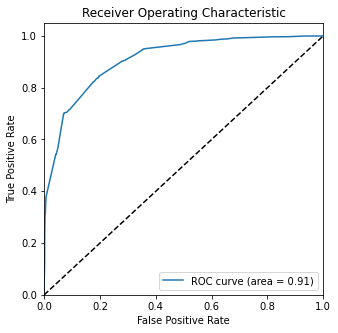

In [95]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding optimal value of the cut off

In [96]:
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5191,0,0.140190,5191,0,1,1,0,0,0,0,0,0,0,0
6400,0,0.140190,6400,0,1,1,0,0,0,0,0,0,0,0
6058,0,0.050888,6058,0,1,0,0,0,0,0,0,0,0,0
2988,1,0.671939,2988,1,1,1,1,1,1,1,1,0,0,0
6352,0,0.001203,6352,0,1,0,0,0,0,0,0,0,0,0


In [97]:
df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.378523,1.000000,0.000000,0.378523
0.1,0.1,0.677216,0.970882,0.498353,0.541029
0.2,0.2,0.770430,0.927621,0.674690,0.634604
0.3,0.3,0.789482,0.902662,0.720547,0.663000
0.4,0.4,0.819084,0.837354,0.807955,0.726453
0.5,0.5,0.837821,0.705491,0.918419,0.840436
0.6,0.6,0.842544,0.700499,0.929060,0.857434
0.7,0.7,0.805070,0.564892,0.951355,0.876129
0.8,0.8,0.755786,0.364393,0.994173,0.974416
0.9,0.9,0.748386,0.343594,0.994933,0.976359


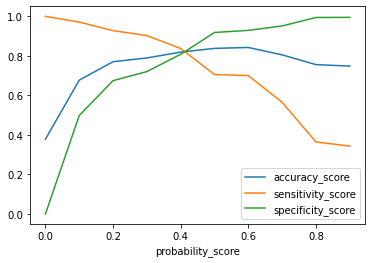

In [98]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

### Precision -Recall Trade off

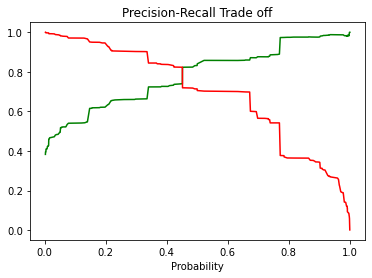

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

#### In Sensitivity-Specificity-Accuracy plot 0.4 probability looks optimal. In Precision-Recall Curve 0.4 looks optimal.

In [100]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
5191,0,0.140190,5191,0,14
6400,0,0.140190,6400,0,14
6058,0,0.050888,6058,0,5
2988,1,0.671939,2988,1,67
6352,0,0.001203,6352,0,0


In [101]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3189  758]
 [ 391 2013]]
Accuracy : 0.8190836088804913
Sensitivity : 0.8373544093178037
Specificity : 0.8079554091715226
Precision : 0.7264525442078672


(0.8190836088804913,
 0.8373544093178037,
 0.8079554091715226,
 0.7264525442078672)

In [102]:
# Getting the predicted values on the train set
x_test_sm = sm.add_constant(x_test[col])
y_test_pred = res.predict(x_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.4 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,1,9192,0.540092,1,54
1,1,901,0.769421,1,77
2,1,3710,0.909162,1,91
3,1,7452,0.451353,1,45
4,0,3418,0.004250,0,0


In [103]:
evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1366  326]
 [ 170  861]]
Accuracy : 0.8178479618068307
Sensitivity : 0.8351115421920465
Specificity : 0.8073286052009456
Precision : 0.7253580454928391


(0.8178479618068307,
 0.8351115421920465,
 0.8073286052009456,
 0.7253580454928391)

In [104]:
print( col)
print(res.params)

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email'],
      dtype='object')
const                                                  -2.957924
Lead Origin_Landing Page Submission                    -1.012302
Lead Origin_Lead Add Form                               2.541726
Last Activity_Email Opened                              1.130430
Last Activity_Other Activity                            1.324519
Last Activity_SMS Sent                                  2.530683
Specialization_Other_Specialization                    -1.500381
What is your current occupation_Unemployed           

## Conclusion

1. The logistic regression model is used to predict the probabilty of conversion of a customer.
2. Optimum cut off is chosen to be 0.4
3. Our final Logistic Regression Model is built with 15 features.
4. Final model Sensitivity of train and test : 84%
5. Final mode Specificity of train and test : 81%
6. Final model Accuracy of train and test : 82%
7. Final mode Precision of train and test : 73%
8. Features used in final model are ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email']   

---end---